<a href="https://colab.research.google.com/github/masp42/integrate_CA/blob/main/Marcelo_Pugliesi_Marina_AI_DV_DP_ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts


In [3]:
# Importing dataset from Github
df = pd.read_csv("https://raw.githubusercontent.com/masp42/integrate_CA/main/forestfires.csv")  

In [4]:
# Display first 20 rows of dataset
df.head(20)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [5]:
# showing number of rows and columns
df.shape

(517, 13)

In [6]:
# Dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
# Dataset columns names
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [8]:
# Identifying the number of missing values in the dataset
df.isnull().sum() 

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [12]:
# Obect type of data information
df.describe(include=['O'])

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [13]:
# Table describing min, median, std, max and 25%, 50%, 75% values.
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


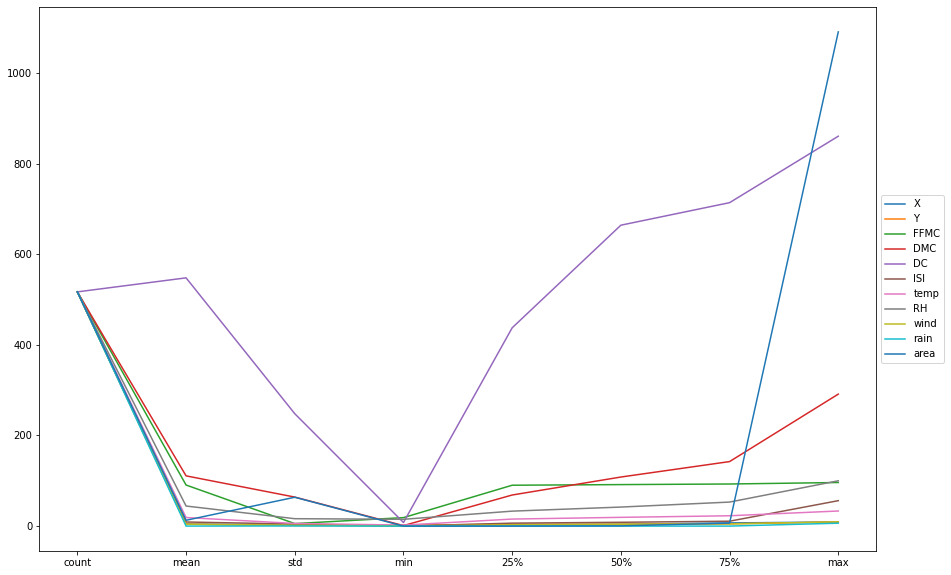

In [14]:
df.describe().plot(figsize = (15, 10)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

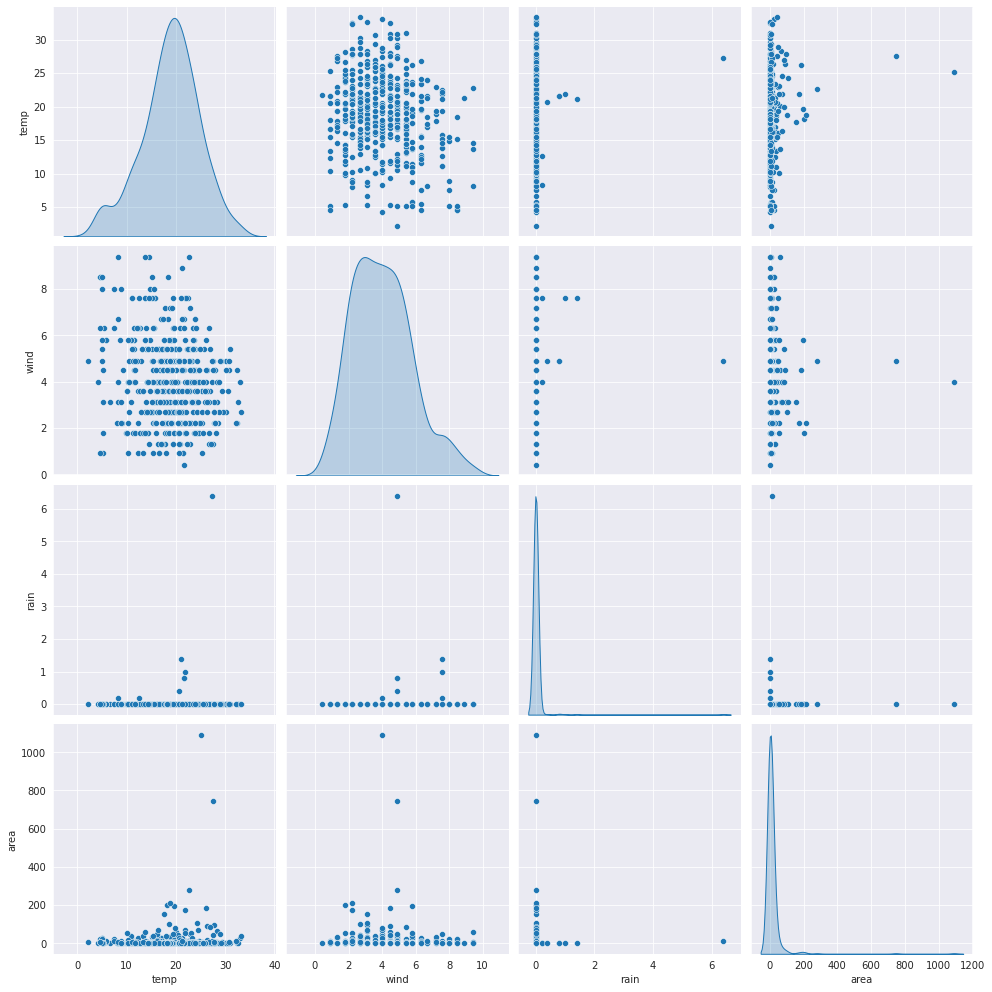

In [38]:
sns.set_style('darkgrid')
# Find the relation
# plt.subplot(forest_df)

sns.pairplot(df[["temp", "wind", "rain", "area"]],diag_kind="kde",height=3.5)
plt.show()

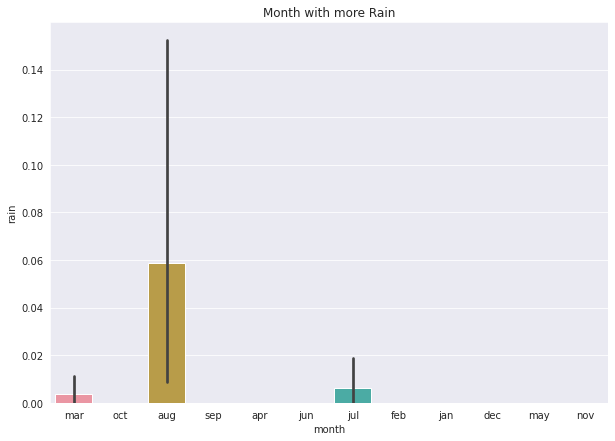

In [46]:
plt.figure(figsize =(10, 7))
sns.barplot(x = "month",
            y = "rain",
            data = df)
plt.title("Month with more Rain")
plt.show()

Text(0.5, 1.0, 'Burned Area by Month')

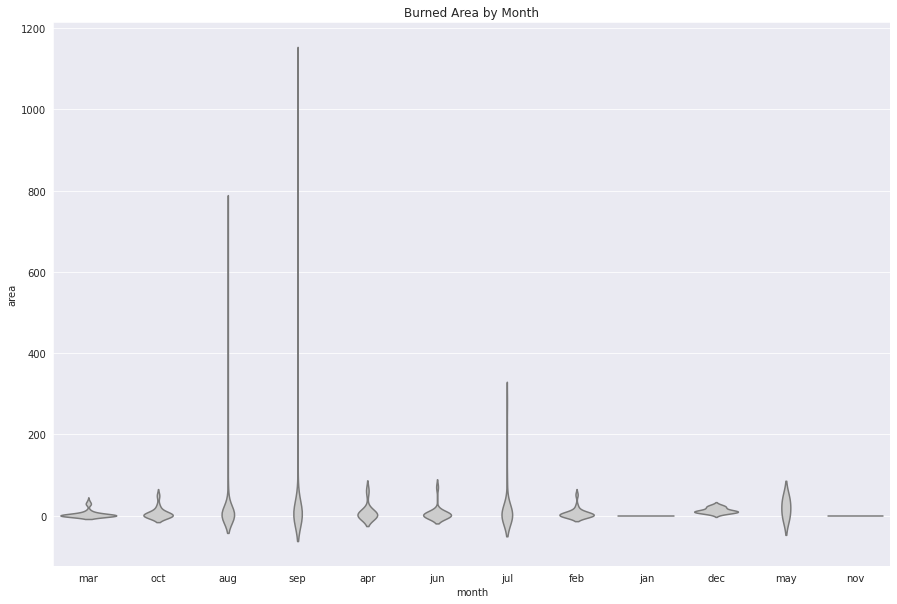

In [60]:

plt.figure(figsize =(15, 10))
sns.violinplot(x='month', y='area', data=df, inner=None, color=".8")
plt.title("Burned Area by Month")

Text(0.5, 1.0, 'Wind by month')

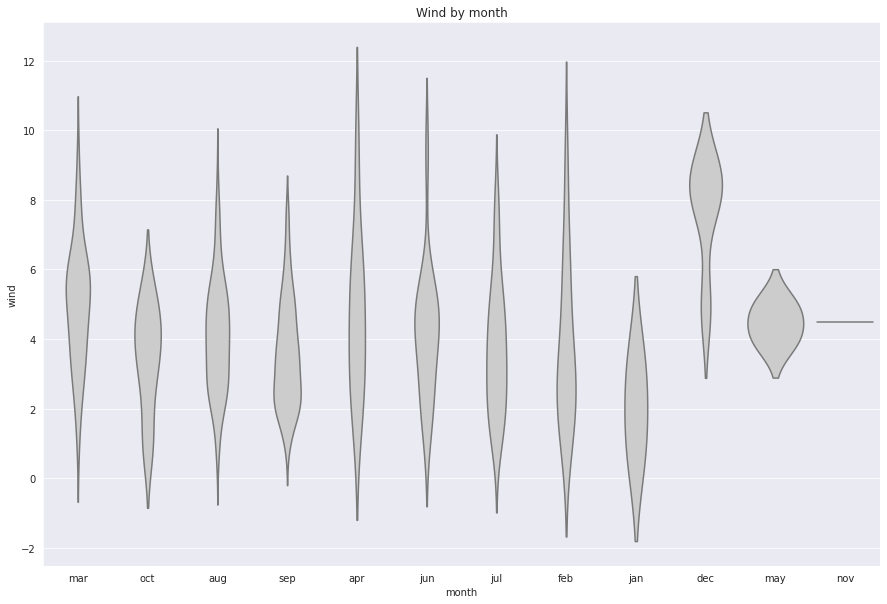

In [100]:
plt.figure(figsize =(15, 10))
sns.violinplot(x='month', y='wind', data=df, inner=None, color=".8")
plt.title("Wind by month")

Text(0.5, 1.0, 'Ship Mode and Discount by Region')

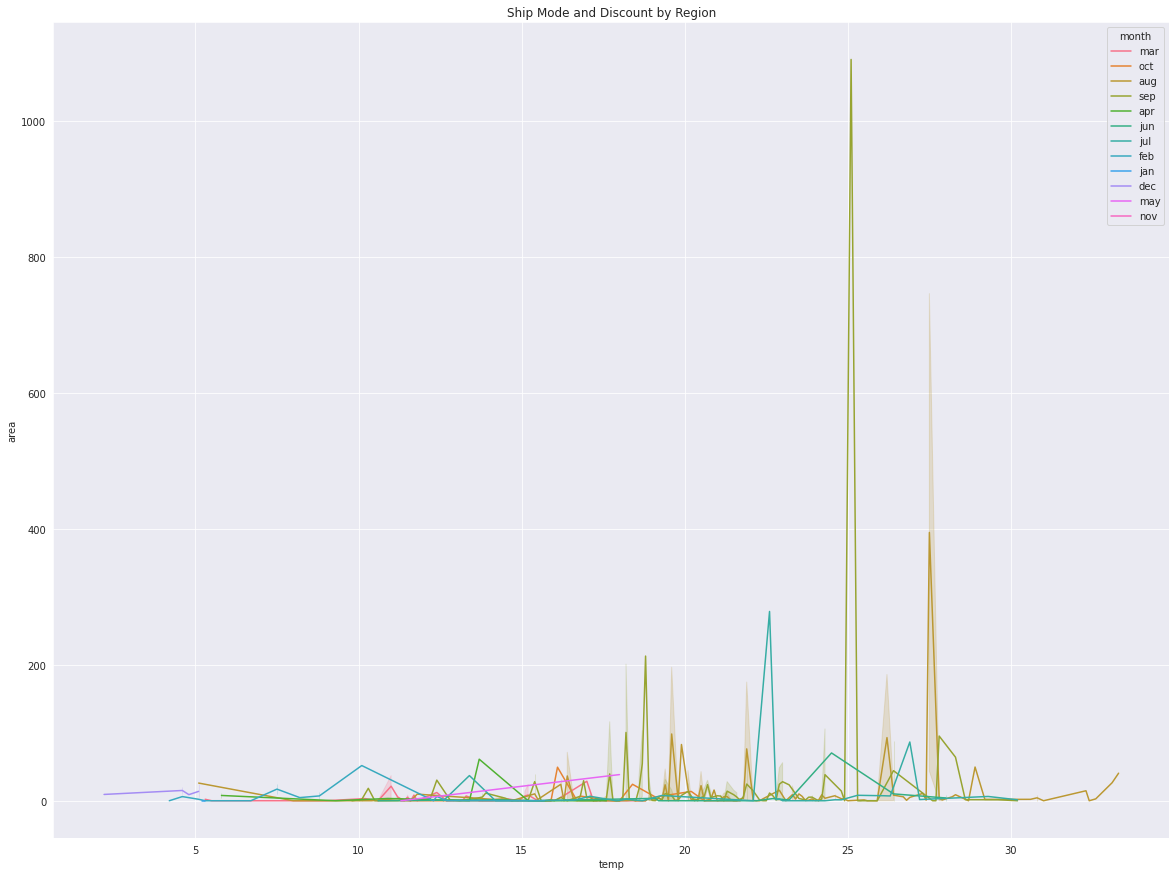

In [59]:
plt.figure(figsize =(20, 15))
sns.lineplot(x="temp", y="area",
             hue="month",
             data=df)
plt.title("Temperature area burned by Month")

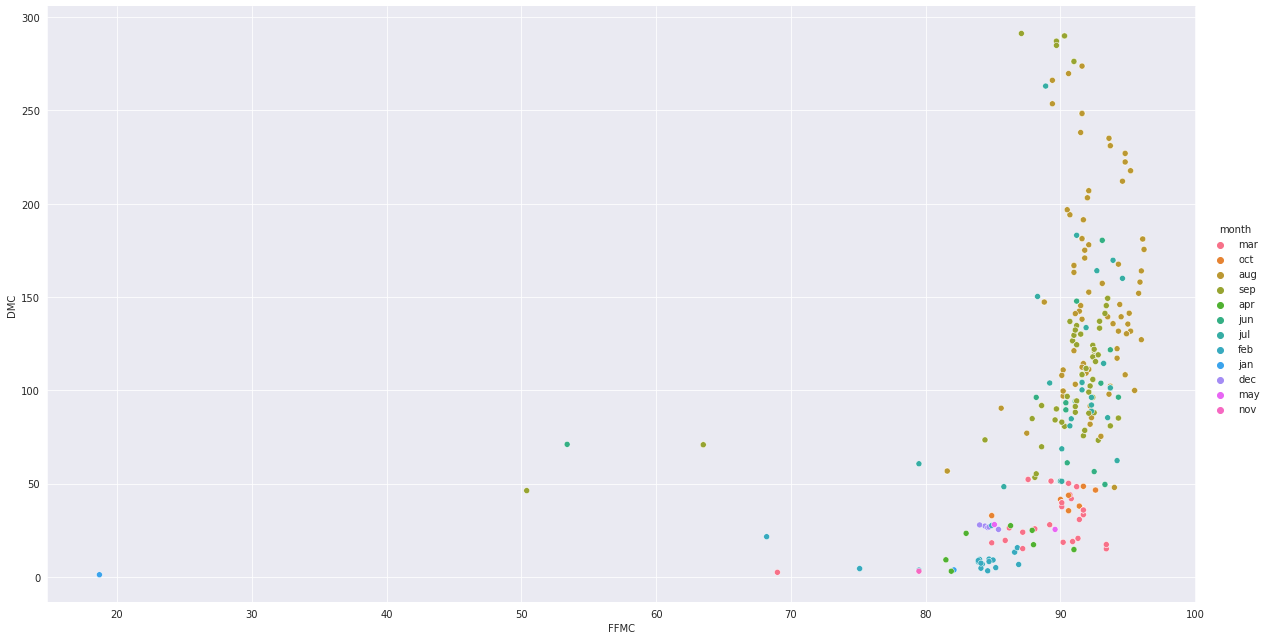

In [77]:
sns.relplot(
    data=df,height=9, aspect=15/8,
    x="FFMC", y="DMC", hue="month"
)

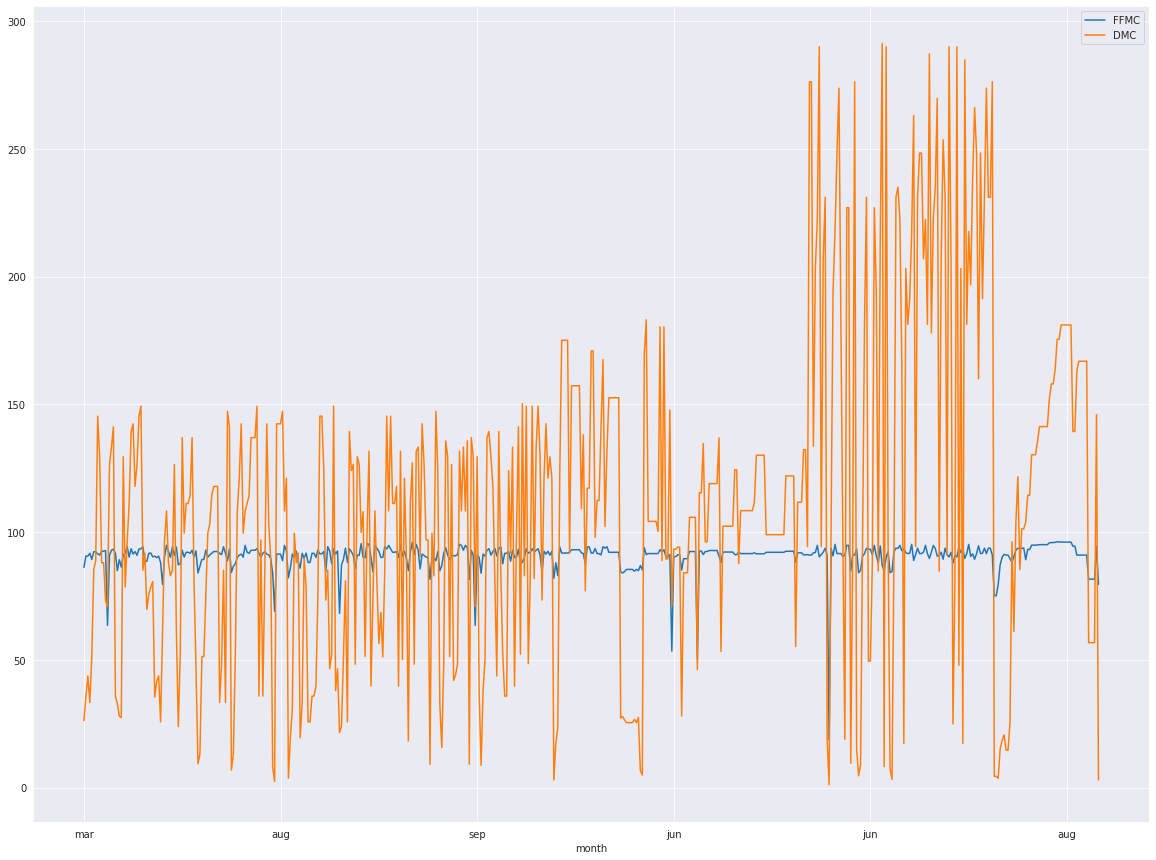

(None,)

In [92]:
df.plot(figsize=(20, 15), x="month", y=["FFMC", "DMC"])
plt.show(),

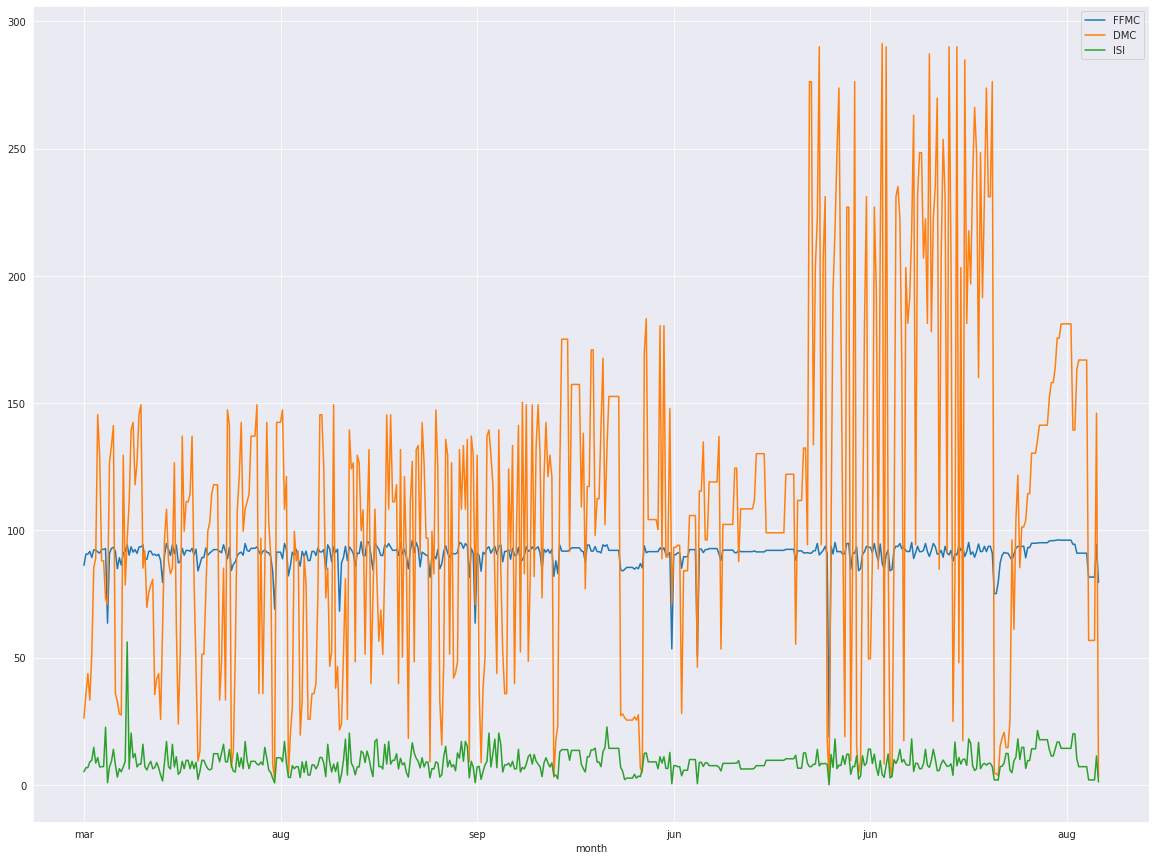

(None,)

In [91]:
df.plot(figsize=(20, 15), x="month", y=["FFMC", "DMC", "ISI"])
plt.show(),

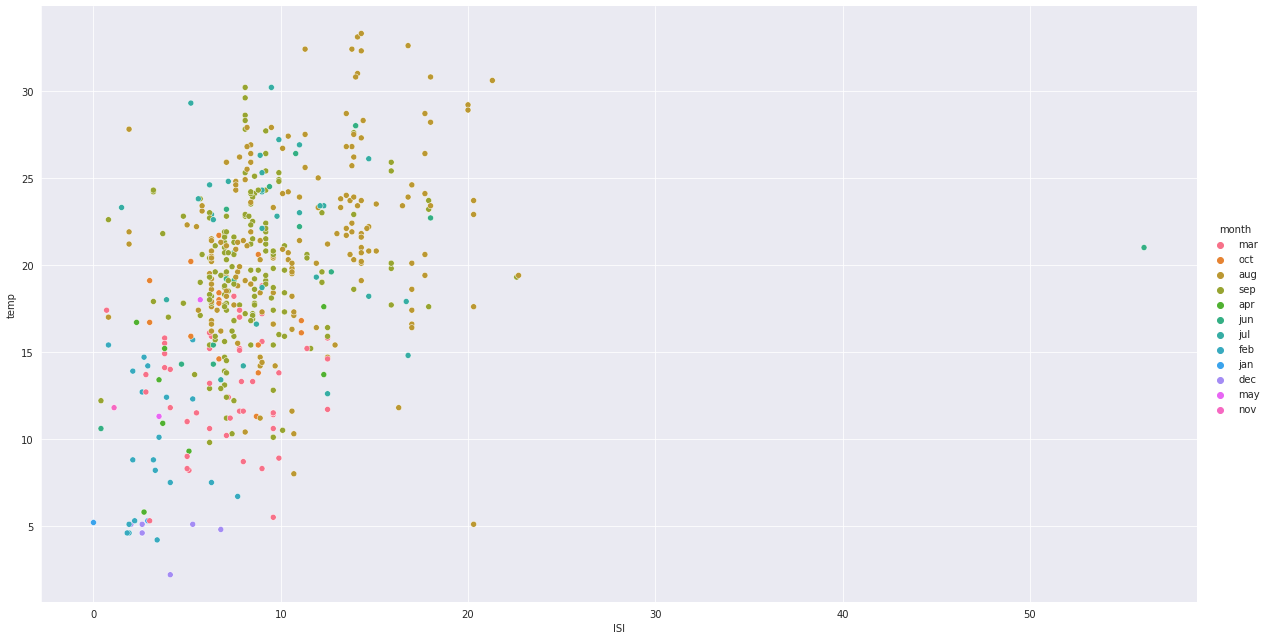

In [78]:
sns.relplot(
    data=df,height=9, aspect=15/8,
    x="ISI", y="temp", hue="month"
)

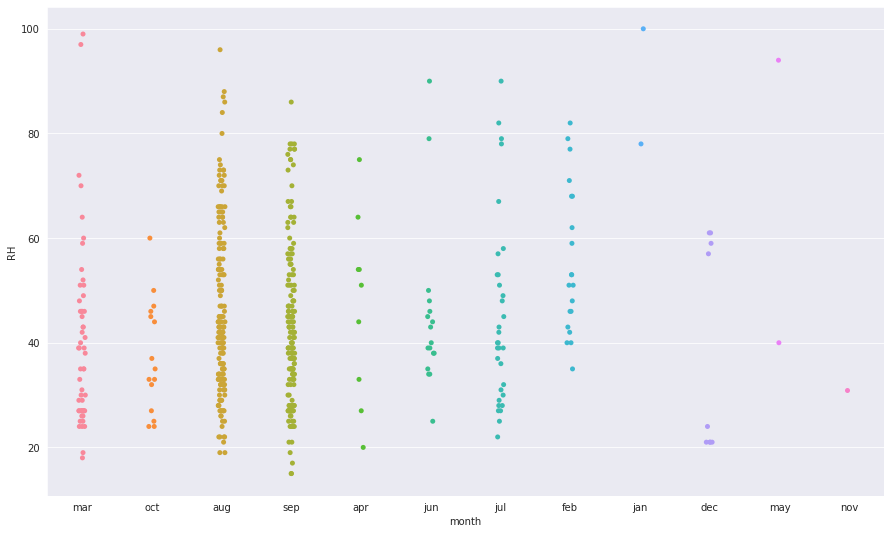

In [101]:
plt.figure(figsize =(15, 9))
sns.stripplot(x="month", y="RH", data=df, jitter=0.05)

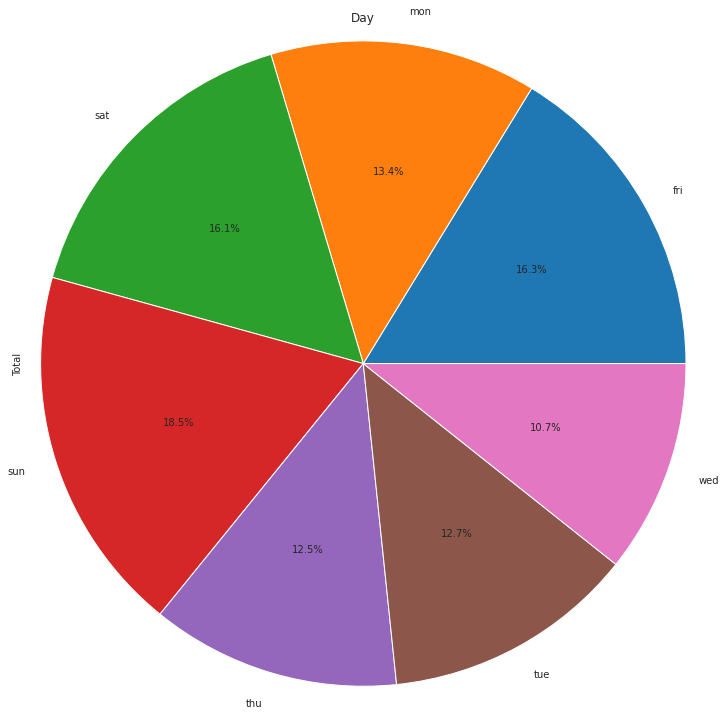

In [103]:
plt.figure(figsize =(15, 10))
df['Total'] = df.sum(axis=1)
df_ShipMode = df.groupby('day', axis = 0).sum()
df_ShipMode['Total'].plot(kind='pie', radius=1.2, autopct='%1.1f%%')
plt.title('Day')
plt.tight_layout()

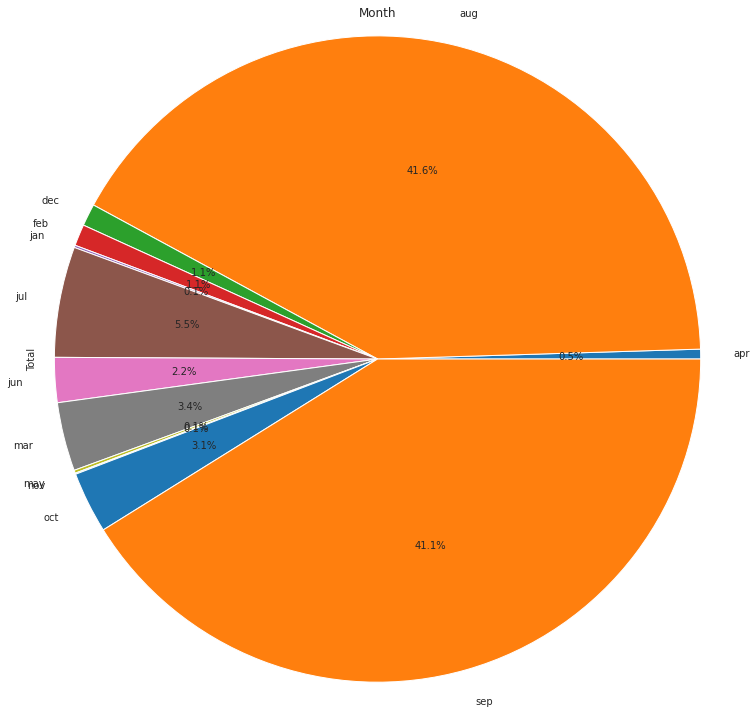

In [104]:
plt.figure(figsize =(15, 10))
df['Total'] = df.sum(axis=1)
df_ShipMode = df.groupby('month', axis = 0).sum()
df_ShipMode['Total'].plot(kind='pie', radius=1.2, autopct='%1.1f%%')
plt.title('Month')
plt.tight_layout()

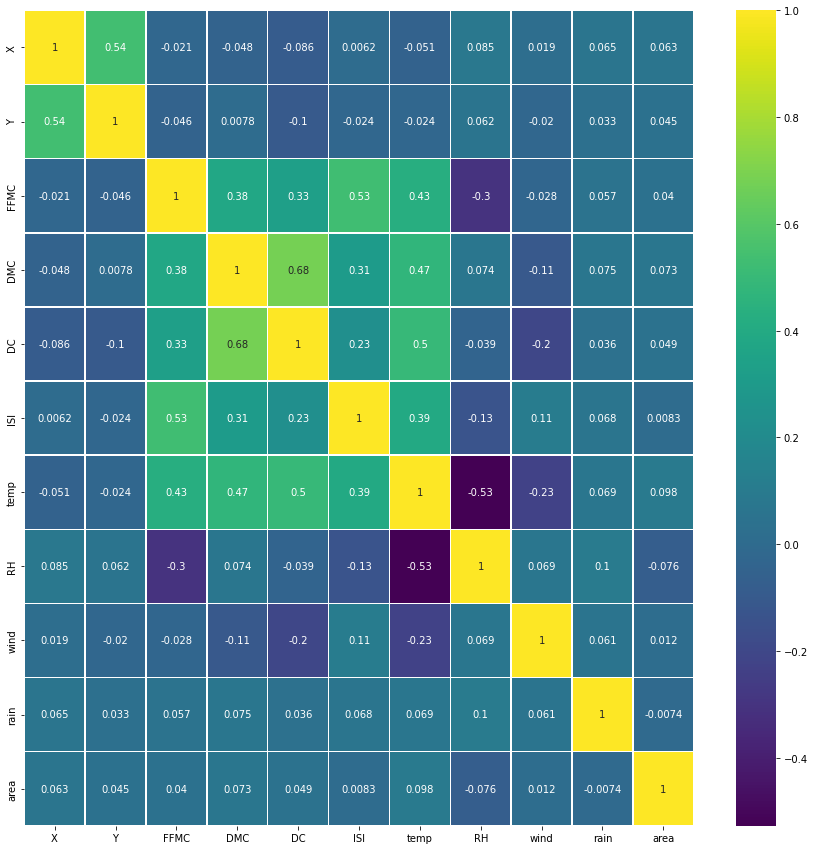

In [19]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)